In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npimblearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
df = pd.read_csv('dataset_2_1.csv')

In [6]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print("\nUnique countries in the dataset:")
print(df['Country'].unique())


Unique countries in the dataset:
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']


In [10]:
df.replace('NA', np.nan, inplace=True)

In [11]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [13]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 or x > 100 else x)
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\430632\AppData\Local\Temp\ipykernel_4140\3513644294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [14]:
print(df.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64


In [15]:
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [16]:
def assign_region(country):
    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['United Kingdom', 'France', 'Portugal', 'Netherlands', 'Switzerland',
                    'Poland', 'Germany', 'Russia', 'Slovenia', 'Austria', 'Ireland',
                    'Belgium', 'Sweden', 'Italy', 'Moldova', 'Czech Republic', 'Finland',
                    'Greece']:
        return 'Europe'
    elif country in ['India', 'Singapore', 'Philippines', 'China']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['Brazil', 'Colombia', 'Costa Rica']:
        return 'South America'
    elif country in ['South Africa']:
        return 'Africa'
    elif country in ['Israel']:
        return 'Middle East'
    else:
        return 'Other'

df['Region'] = df['Country'].apply(assign_region)

In [17]:
print("\nAge Group distribution:")
print(df['Age_Group'].value_counts())
print("\nRegion distribution:")
print(df['Region'].value_counts())


Age Group distribution:
Age_Group
26-35    706
36-45    277
19-25    210
46-55     42
56-65     13
0-18      10
66+        1
Name: count, dtype: int64

Region distribution:
Region
North America    826
Europe           347
Oceania           29
Other             21
Asia              16
South America      9
Africa             6
Middle East        5
Name: count, dtype: int64


In [18]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'm': 'Male', 'male-ish': 'Male', 'maile': 'Male', 'cis male': 'Male', 'man': 'Male',
    'male ': 'Male', 'cis man': 'Male', 'male (cis)': 'Male',
    'f': 'Female', 'female ': 'Female', 'woman': 'Female', 'cis female': 'Female', 
    'femail': 'Female', 'female (cis)': 'Female', 'cis-female/femme': 'Female',
    'trans-female': 'Other', 'p': 'Other', 'ostensibly male, unsure what that really means': 'Other',
    'something kinda male?': 'Other', 'female (trans)': 'Other', 'queer/she/they': 'Other', 
    'non-binary': 'Other', 'fluid': 'Other', 'genderqueer': 'Other', 'androgyne': 'Other', 
    'agender': 'Other', 'trans woman': 'Other', 'neuter': 'Other', 'queer': 'Other', 
    'a little about you': 'Other', 'guy (-ish) ^_^': 'Male'
})

In [21]:
features = ['Age', 'Gender', 'family_history', 'work_interfere', 'no_employees', 
            'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 
            'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 
            'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 
            'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'Region']
target = 'treatment'

In [22]:
le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object' or col == 'Age_Group' or col == 'Region':
        df[col] = le.fit_transform(df[col].astype(str))

In [23]:
X = df[features]
y = df[target].map({'Yes': 1, 'No': 0})

In [24]:
print("\nClass distribution in target variable:")
print(y.value_counts(normalize=True))


Class distribution in target variable:
treatment
1    0.505957
0    0.494043
Name: proportion, dtype: float64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [28]:
results = {}

In [29]:
for name, model in models.items():
    # Train model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    
    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

# Display results
print("\nModel Evaluation Summary:")
results_df = pd.DataFrame(results).T
print(results_df)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       129
           1       0.71      0.68      0.70       123

    accuracy                           0.71       252
   macro avg       0.71      0.71      0.71       252
weighted avg       0.71      0.71      0.71       252


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       129
           1       0.79      0.86      0.82       123

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.61      0.74      0.66       129
           1       0.64      0.50      0.56       123

    accuracy                           0.62       252
   mac

In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [31]:
rf = RandomForestClassifier(random_state=42)

In [32]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [33]:
print("\nBest parameters for Random Forest:")
print(grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)


Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1-Score: 0.8232347678304164


In [34]:
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_tuned))


Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       129
           1       0.79      0.86      0.82       123

    accuracy                           0.82       252
   macro avg       0.82      0.82      0.82       252
weighted avg       0.82      0.82      0.82       252



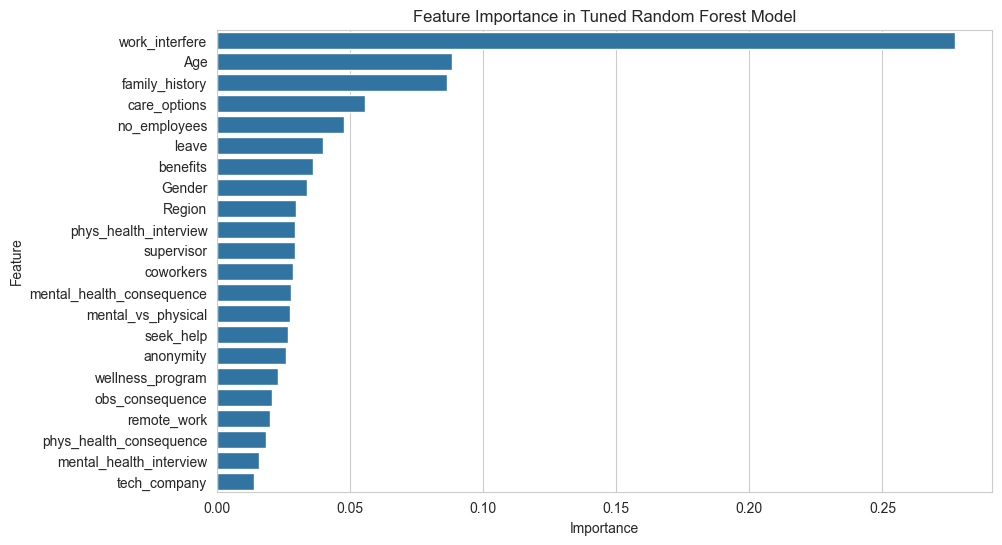

In [35]:
feature_importance = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance in Tuned Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()